# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
Analysis
Trend 1. Cities with highest temperature tend to cluster around the equator. 
         It seems that the span of high temperature tends to go further into the northern part from the equator than to the south.
Trend 2. The humidity of cities seem to cluster more with humidity of 60% or above. The idea that human tends to live by water 
         source may explain why cities are more to be found with average higher humidity. Latitude do not seem to have any obvious
         relationship with humidity of cities.
Trend 3. The cloudiness of cities included do not seem to have obvious relationship with the latitude of the cities.
Trend 4. No obvious relationship is observed between wind speed and latitude where the cities are located. 
         Most Cities seem to be found with wind speed below 15 miles per hour.


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
%matplotlib inline


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up the lists 
City = []
Cloudiness = []
Country = []
Date =[]
Humidity = []
Lat =[]
Lng=[]
MaxTemp=[]
WindSpeed =[]

#set up counter, set limit and set counter
set = 1
i = 1
setlimit = 30

#Begin api call to obtain data.....

BeginPrint = 'Beginning Data Retrieval'
Printline = '-----------------------------'
print(BeginPrint)
print(Printline)

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL

query_url = f"{url}appid={api_key}&units={units}&q=" 

for city in cities:
      
    weather_json= requests.get(query_url + city).json()
    if i % setlimit == 0: set += 1 
    if i % 60 == 0:  time.sleep(60)
    
    if weather_json['cod'] == 200:
        
        City.append(city)
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        
        Lat.append(weather_json['coord']['lat'])
       
        Lng.append(weather_json['coord']['lon'])
        MaxTemp.append(weather_json['main']['temp_max'])
        WindSpeed.append(weather_json['wind']['speed'])
        print(f'Processing Record {i} of Set {set} | {city}')
  
        i += 1

        
    elif weather_json['cod'] == 400:
        print('City not found. Skipping...')
    

   
print('-----------------------------')
print('Data Retrieval Complete ')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | payakumbuh
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | milin
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | avera
Processing Record 18 of Set 1 | bukama
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | margate
Processing Record 22 of Set 1 | shimoda
Processing Record 23 of Set 1 | saskylakh
Processing Record 2

Processing Record 198 of Set 8 | guerrero negro
Processing Record 199 of Set 8 | darhan
Processing Record 200 of Set 8 | ostrovnoy
Processing Record 201 of Set 8 | bonavista
Processing Record 202 of Set 8 | artyom
Processing Record 203 of Set 8 | luganville
Processing Record 204 of Set 8 | baruun-urt
Processing Record 205 of Set 8 | sorochinsk
Processing Record 206 of Set 8 | ribeira grande
Processing Record 207 of Set 8 | bredasdorp
Processing Record 208 of Set 8 | orange
Processing Record 209 of Set 8 | turukhansk
Processing Record 210 of Set 9 | belaya gora
Processing Record 211 of Set 9 | santiago de las vegas
Processing Record 212 of Set 9 | krasnyy chikoy
Processing Record 213 of Set 9 | maua
Processing Record 214 of Set 9 | rafai
Processing Record 215 of Set 9 | mozarlandia
Processing Record 216 of Set 9 | oyem
Processing Record 217 of Set 9 | saldanha
Processing Record 218 of Set 9 | almaznyy
Processing Record 219 of Set 9 | lonavale
Processing Record 220 of Set 9 | road town
P

Processing Record 389 of Set 15 | mae sai
Processing Record 390 of Set 16 | klaksvik
Processing Record 391 of Set 16 | tsybli
Processing Record 392 of Set 16 | broken hill
Processing Record 393 of Set 16 | great yarmouth
Processing Record 394 of Set 16 | ngaoundere
Processing Record 395 of Set 16 | dingle
Processing Record 396 of Set 16 | mayumba
Processing Record 397 of Set 16 | emilio carranza
Processing Record 398 of Set 16 | ahuimanu
Processing Record 399 of Set 16 | launceston
Processing Record 400 of Set 16 | tyrma
Processing Record 401 of Set 16 | college
Processing Record 402 of Set 16 | ponta do sol
Processing Record 403 of Set 16 | isangel
Processing Record 404 of Set 16 | khash
Processing Record 405 of Set 16 | fairbanks
Processing Record 406 of Set 16 | atar
Processing Record 407 of Set 16 | mehamn
Processing Record 408 of Set 16 | kharp
Processing Record 409 of Set 16 | den helder
Processing Record 410 of Set 16 | iquique
Processing Record 411 of Set 16 | arrifes
Processin

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame(cities)
df.to_csv(output_data_file, encoding="utf-8", index=False)


In [9]:

weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    'Date': Date,
    'Humidity': Humidity,
    'Lat':Lat,
    'Lng': Lng,
    'Max Temp': MaxTemp,
    'Wind Speed': WindSpeed
    }
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port elizabeth,90,US,1537475760,75,39.31,-74.98,73.94,9.17
1,ushuaia,75,AR,1537473600,60,-54.81,-68.31,39.20,4.70
2,hermanus,8,ZA,1537476485,93,-34.42,19.24,34.77,3.13
3,saint george,20,GR,1537473000,77,39.45,22.34,62.60,3.13
4,lebu,0,ET,1537476497,84,8.96,38.73,44.49,2.57


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

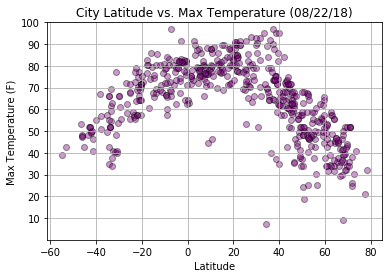

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(Lat, MaxTemp, marker="o", facecolors="purple", edgecolors="black", alpha=0.40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (08/22/18)')

plt.savefig("Latitude_vs_Max_Temperature")
ax.set_yticks([10,20,30,40,50,60,70,80,90,100])
plt.ylim(0, 100)
plt.grid()

plt.show()

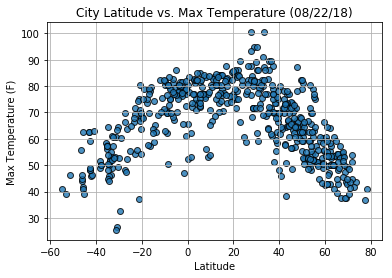

#### Latitude vs. Humidity Plot

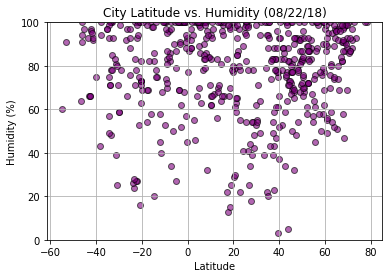

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(Lat, Humidity, marker="o", facecolors="purple", edgecolors="black", alpha=0.60)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (08/22/18)')
plt.ylim(0,100)
plt.savefig("Latitude_vs_Humidity")
plt.grid()

plt.show()

#### Latitude vs. Cloudiness Plot

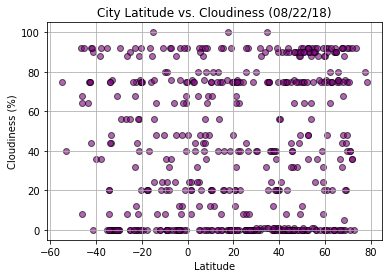

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(Lat, Cloudiness, marker="o", facecolors="purple", edgecolors="black", alpha=0.60)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (08/22/18)')
#plt.ylim(0,100)
plt.savefig("Latitude_vs_Cloudiness")
plt.grid()

plt.show()

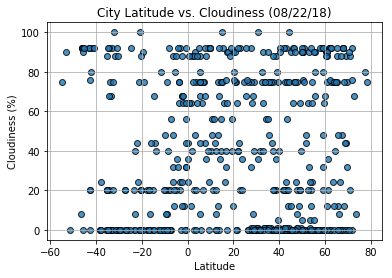

#### Latitude vs. Wind Speed Plot

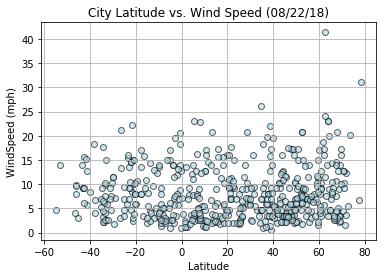

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(Lat, WindSpeed, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.60)
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.title('City Latitude vs. Wind Speed (08/22/18)')

plt.savefig("Latitude_vs_WindSpeed")
plt.grid()

plt.show()

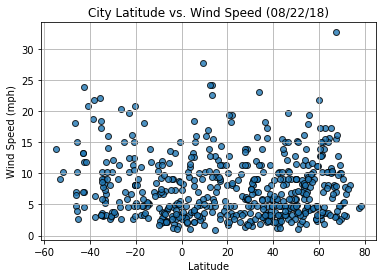